### Homework 8 - KNN and MLP Model Comparison

## Ethan DeMelo

# 

In [10]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
 #Import accuracy score and balanced accuracy score from model metrics package
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix,  roc_auc_score

df = pd.read_csv("https://raw.githubusercontent.com/Eldemelo/Classes/Development/CSC310/Homework/homework_8/CrohnD.csv")
df.head()

,rownames,ID,nrAdvE,BMI,height,country,sex,age,weight,treat
0,1,19908,4,25.22,163,c1,F,47,67,placebo
1,2,19909,4,23.80,164,c1,F,53,64,d1
2,3,19910,1,23.05,164,c1,F,68,62,placebo
3,4,20908,1,25.71,165,c1,F,48,70,d2
4,5,20909,2,25.95,170,c1,F,67,75,placebo


In [11]:
# Clean Data
df['country '] = df['country '].str.strip().replace('c1', '0')
df['country '] = df['country '].str.strip().replace('c2', '1')
df['sex '] = df['sex '].str.strip().replace('F', '0')
df['sex '] = df['sex '].str.strip().replace('M', '1')

df.head()

,rownames,ID,nrAdvE,BMI,height,country,sex,age,weight,treat
0,1,19908,4,25.22,163,0,0,47,67,placebo
1,2,19909,4,23.80,164,0,0,53,64,d1
2,3,19910,1,23.05,164,0,0,68,62,placebo
3,4,20908,1,25.71,165,0,0,48,70,d2
4,5,20909,2,25.95,170,0,0,67,75,placebo


In [12]:
features  = df.drop(['treat'],axis=1)
target = df['treat']
X_train,X_test,y_train,y_test=train_test_split(features,target,train_size=0.7, test_size=0.3,random_state=2)

In [13]:
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state= 1 )
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

[Text(0.4782608695652174, 0.9166666666666666, 'ID     <= 25918.5\nentropy = 1.582\nsamples = 81\nvalue = [25, 27, 29]\nclass = d2'),
 Text(0.2826086956521739, 0.75, 'age  <= 57.5\nentropy = 1.449\nsamples = 34\nvalue = [5, 13, 16]\nclass = d2'),
 Text(0.3804347826086957, 0.8333333333333333, 'True  '),
 Text(0.17391304347826086, 0.5833333333333334, 'weight  <= 56.0\nentropy = 1.529\nsamples = 22\nvalue = [5, 10, 7]\nclass = d1'),
 Text(0.08695652173913043, 0.4166666666666667, 'ID     <= 25410.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1, 0]\nclass = placebo'),
 Text(0.043478260869565216, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = placebo'),
 Text(0.13043478260869565, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = d1'),
 Text(0.2608695652173913, 0.4166666666666667, 'ID     <= 21908.5\nentropy = 1.382\nsamples = 18\nvalue = [2, 9, 7]\nclass = d1'),
 Text(0.21739130434782608, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = placebo'),
 Text(

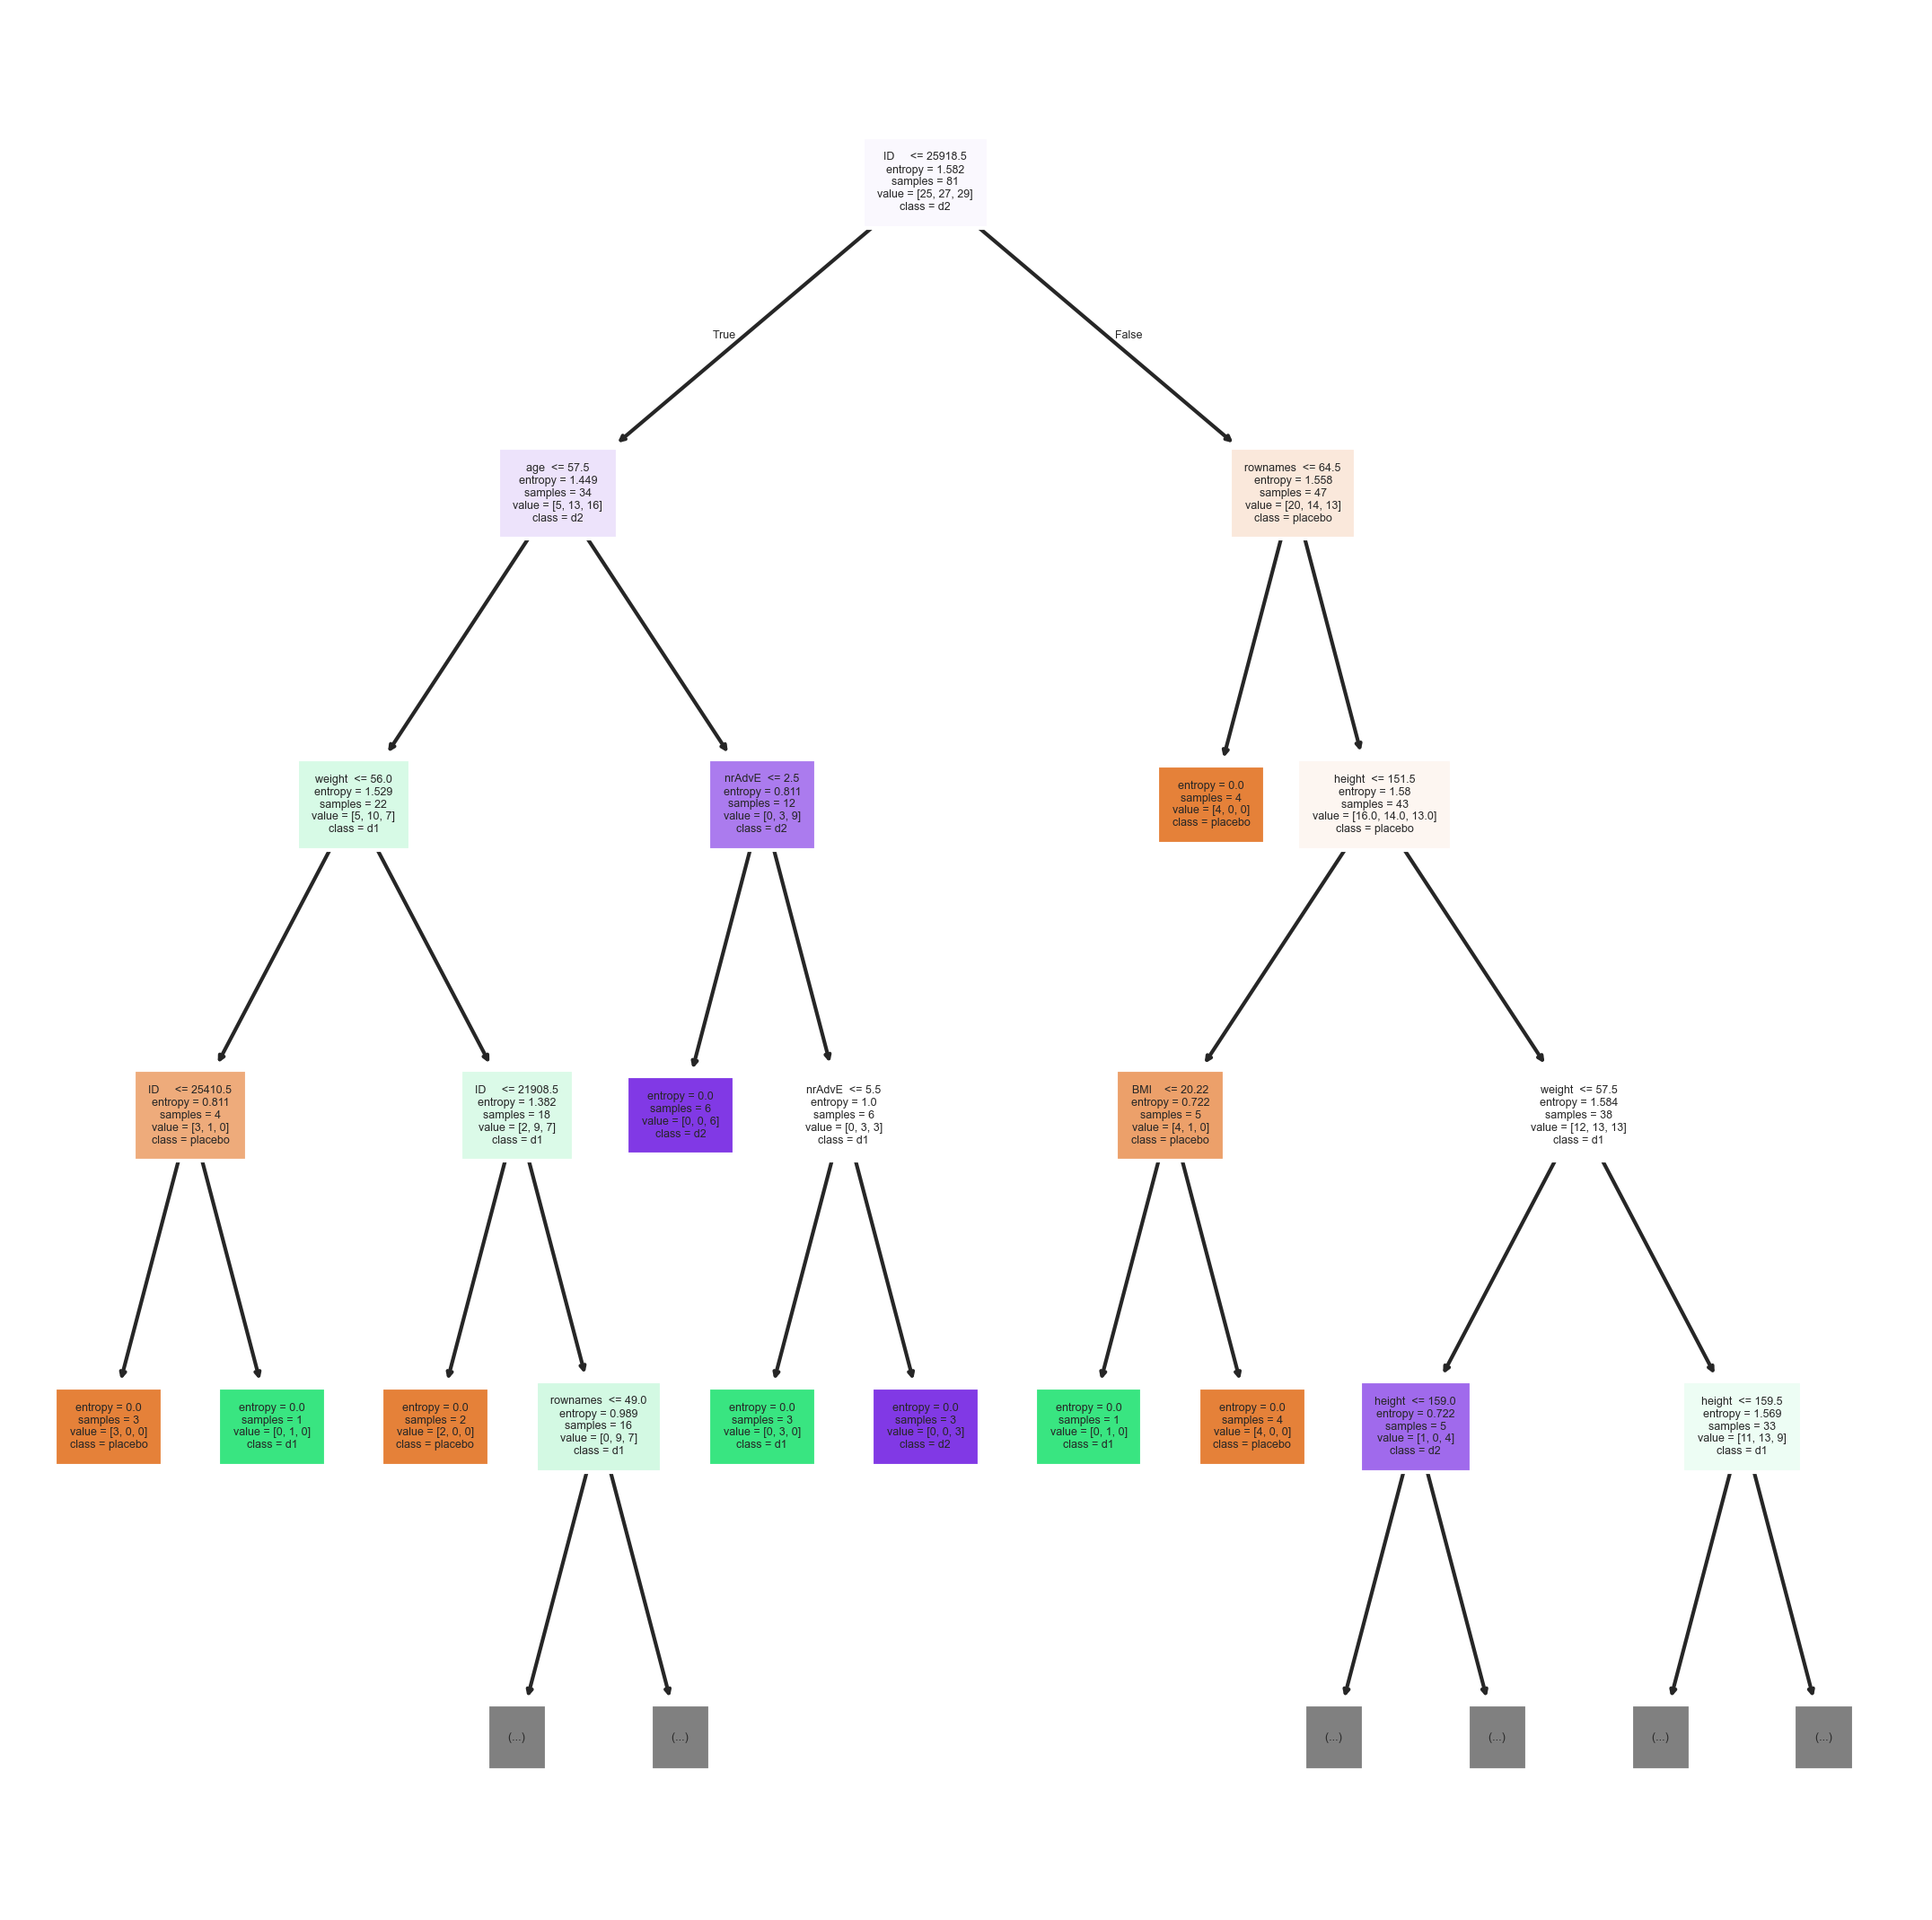

In [14]:
import matplotlib.pyplot as plt #importing pyplot class from the matplotlib library
from sklearn.tree import plot_tree #importing the plot_tree function from 
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=300) #creating a subplot grid
plot_tree(model, fontsize=3, filled=True, #creating a plot of the tree
               max_depth=4,
               feature_names= features.columns,
               class_names= target.unique())

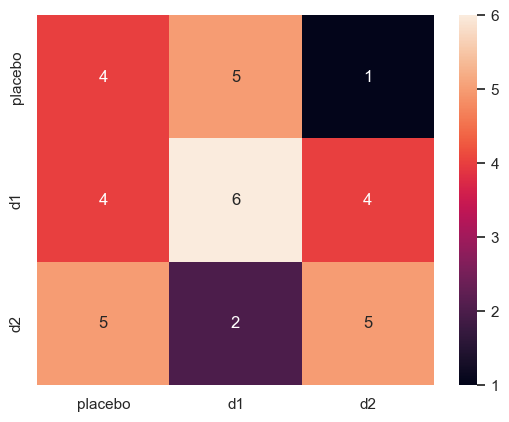

In [15]:
labels= list(target.unique())
cm = confusion_matrix(y_test, pred_test, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
f = sns.heatmap(cm_df, annot=True, fmt='d')

In [20]:
pp, pd1, pd2, d1p, d1d1, d1d2, d2p, d2d1, d2d2 = confusion_matrix(y_test, pred_test).ravel()
pp, pd1, pd2, d1p, d1d1, d1d2, d2p, d2d1, d2d2

(6, 4, 4, 2, 5, 5, 5, 1, 4)

In [23]:
acc = (pp + d1d1 + d2d2) / (pp + pd1 + pd2 + d1p + d1d1 + d1d2 + d2p + d2d1 + d2d2)
acc

0.4166666666666667

In [24]:
print("Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test)))

Accuracy: 0.42


In [2]:
# basic data routines
import pandas as pd

#splitting the data
from sklearn.model_selection import KFold,train_test_split

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# model evaluation routines
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
# compute 95% confidence intervals for classification and regression
# problems

def classification_confint(acc, n):
    '''
    Compute the 95% confidence interval for a classification problem.
      acc -- classification accuracy
      n   -- number of observations used to compute the accuracy
    Returns a tuple (lb,ub)
    '''
    import math
    interval = 1.96*math.sqrt(acc*(1-acc)/n)
    lb = max(0, acc - interval)
    ub = min(1.0, acc + interval)
    return (lb,ub)

In [8]:
# get data
url = 'https://raw.githubusercontent.com/Eldemelo/Classes/Development/CSC310/Homework/homework_8/CrohnD.csv' # the URL
df = pd.read_csv(url)
df['country '] = df['country '].str.strip().replace('c1', '0')
df['country '] = df['country '].str.strip().replace('c2', '1')
df['sex '] = df['sex '].str.strip().replace('F', '0')
df['sex '] = df['sex '].str.strip().replace('M', '1')
features  = df.drop(['treat'],axis=1)
target = df['treat']

# do train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, test_size=0.2, random_state=3)
# set up the model with k=3
model = KNeighborsClassifier(n_neighbors=3)

In [9]:
# some basic data stats
print("Shape: {}".format(df.shape))
print("Value Counts on the 'treat' Field:")
print(df['treat'].value_counts())

Shape: (117, 10)
Value Counts on the 'treat' Field:
treat
placebo    39
d1         39
d2         39
Name: count, dtype: int64


In [10]:
#train the model
model.fit(X_train, y_train)
predict_y = model.predict(X_test)

#test the model accuracy
acc = accuracy_score(y_test, predict_y)
lb, ub = classification_confint(acc, X_test.shape[0])
print("Accuracy: {:3.2f} ({:3.2f}, {:3.2f})".format(acc, lb, ub))

Accuracy: 0.21 (0.05, 0.37)


In [11]:
# KNN
model = KNeighborsClassifier()

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

# grid search
param_grid = {'n_neighbors': list(range(1,26))}
grid = GridSearchCV(model, param_grid, cv=cv)

# performing grid search
grid.fit(X_train, y_train)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
pred_test = grid.best_estimator_.predict(X_test)
acc = accuracy_score(y_test, pred_test)
lb,ub = classification_confint(acc,X_test.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

Grid Search: best parameters: {'n_neighbors': 8}
Accuracy: 0.29 (0.11,0.47)


In [12]:
# build the confusion matrix
labels = list(target.unique())
cm = confusion_matrix(y_true= y_test,y_pred= pred_test, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Confusion Matrix:
         placebo  d1  d2
placebo        1   3   4
d1             1   2   5
d2             0   4   4


In [13]:
y_test.value_counts()

treat
d2         8
d1         8
placebo    8
Name: count, dtype: int64

In [14]:
8/8/8

0.125

In [15]:
# decision trees
model = DecisionTreeClassifier()

# grid search
param_grid = {'max_depth': list(range(1,21)), 'criterion': ['entropy','gini'] }
grid = GridSearchCV(model, param_grid, cv=cv)

# performing grid search
grid.fit(X_train, y_train)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
pred_test = grid.best_estimator_.predict(X_test)
acc = accuracy_score(y_test, pred_test)
lb,ub = classification_confint(acc,X_test.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

# build the confusion matrix
labels = list(target.unique())
cm = confusion_matrix(y_true= y_test,y_pred= pred_test, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Grid Search: best parameters: {'criterion': 'gini', 'max_depth': 9}
Accuracy: 0.17 (0.02,0.32)
Confusion Matrix:
         placebo  d1  d2
placebo        2   1   5
d1             1   0   7
d2             4   2   2


In [16]:
pp, pd1, pd2, d1p, d1d1, d1d2, d2p, d2d1, d2d2 = confusion_matrix(y_test, pred_test).ravel()
pp, pd1, pd2, d1p, d1d1, d1d2, d2p, d2d1, d2d2

(0, 7, 1, 2, 2, 4, 1, 5, 2)

Comparison:

It seems as though the 1-layer MLP is the more accurate model